* CUST_ID: Identificación única del cliente.
* BALANCE: Saldo actual en la cuenta del cliente.
* BALANCE_FREQUENCY: Frecuencia con la que se actualiza el saldo.
* PURCHASES: Total de compras realizadas por el cliente.
* ONEOFF_PURCHASES: Compras únicas (no recurrentes) realizadas por el cliente.
* INSTALLMENTS_PURCHASES: Compras a plazos realizadas por el cliente.
* CASH_ADVANCE: Adelantos en efectivo solicitados por el cliente.
* PURCHASES_FREQUENCY: Frecuencia con la que el cliente realiza compras.
* ONEOFF_PURCHASES_FREQUENCY: Frecuencia de compras únicas realizadas por el cliente.
* PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia de compras a plazos realizadas por el cliente.
* CASH_ADVANCE_FREQUENCY: Frecuencia de adelantos en efectivo solicitados por el cliente.
* CASH_ADVANCE_TRX: Número de transacciones de adelantos en efectivo.
* PURCHASES_TRX: Número de transacciones de compras.
* CREDIT_LIMIT: Límite de crédito del cliente.
* PAYMENTS: Pagos realizados por el cliente.
* MINIMUM_PAYMENTS: Pagos mínimos realizados por el cliente.
* PRC_FULL_PAYMENT: Porcentaje de pagos realizados en su totalidad por el cliente.
* TENURE: Antigüedad de la cuenta en meses.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Librerías para Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import single, cophenet
from scipy.spatial.distance import pdist, squareform

In [3]:
df = pd.read_csv('CC GENERAL.csv')

## EDA

In [4]:
df.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1729,C11787,304.945628,1.000000,2788.81,2788.81,0.00,266.383091,0.727273,0.727273,0.0,0.090909,6,22,4000.0,2803.353036,130.626533,0.714286,11
2227,C12297,1380.728565,1.000000,0.00,0.00,0.00,126.637116,0.000000,0.000000,0.0,0.166667,3,0,1500.0,279.782836,515.444012,0.000000,12
1402,C11448,584.287125,0.818182,0.00,0.00,0.00,918.151142,0.000000,0.000000,0.0,0.083333,2,0,1000.0,1029.191073,277.371035,0.125000,12
5144,C15289,1804.401706,1.000000,40.00,40.00,0.00,2392.281584,0.083333,0.083333,0.0,0.250000,6,1,2500.0,2459.382382,679.004285,0.000000,12
374,C10386,2045.541408,1.000000,1067.28,0.00,1067.28,0.000000,1.000000,0.000000,1.0,0.000000,0,30,2000.0,2021.775795,3073.416298,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [8]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
#Número de datos vacíos por columna
missing_values_count = df.isnull().sum()

print('Columnas que tienen valores nulos')
print('----------------------------------')

missing_values_count

Columnas que tienen valores nulos
----------------------------------


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Insights

* Se debe hacer imputación de datos en las columnas de CREDIT_LIMIT y MINIMUM_PAYMENTS
* Se debe eliminar la columna CUST_ID porqué no tiene ninguna relevancía para los analisis

## Featuring Engineering

In [10]:
# Imputación de Datos
# Remplazar con el promedio general
credit_limit_mean = float(df['CREDIT_LIMIT'].mean())
minimum_payments_mean = float(df['MINIMUM_PAYMENTS'].mean())

#Imputa el promedio a todos los registros definidos con NaN
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(credit_limit_mean)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean)

In [11]:
# Nueva revisión
# Número de datos vacios por columna
missing_values_count = df.isnull().sum()

#Imprime las columnas que tienen más de un dato con nulos
#La columna Income es la que tiene el problema!
print('Columnas que tienen valores nulos')
print('----------------------------------')

missing_values_count

Columnas que tienen valores nulos
----------------------------------


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

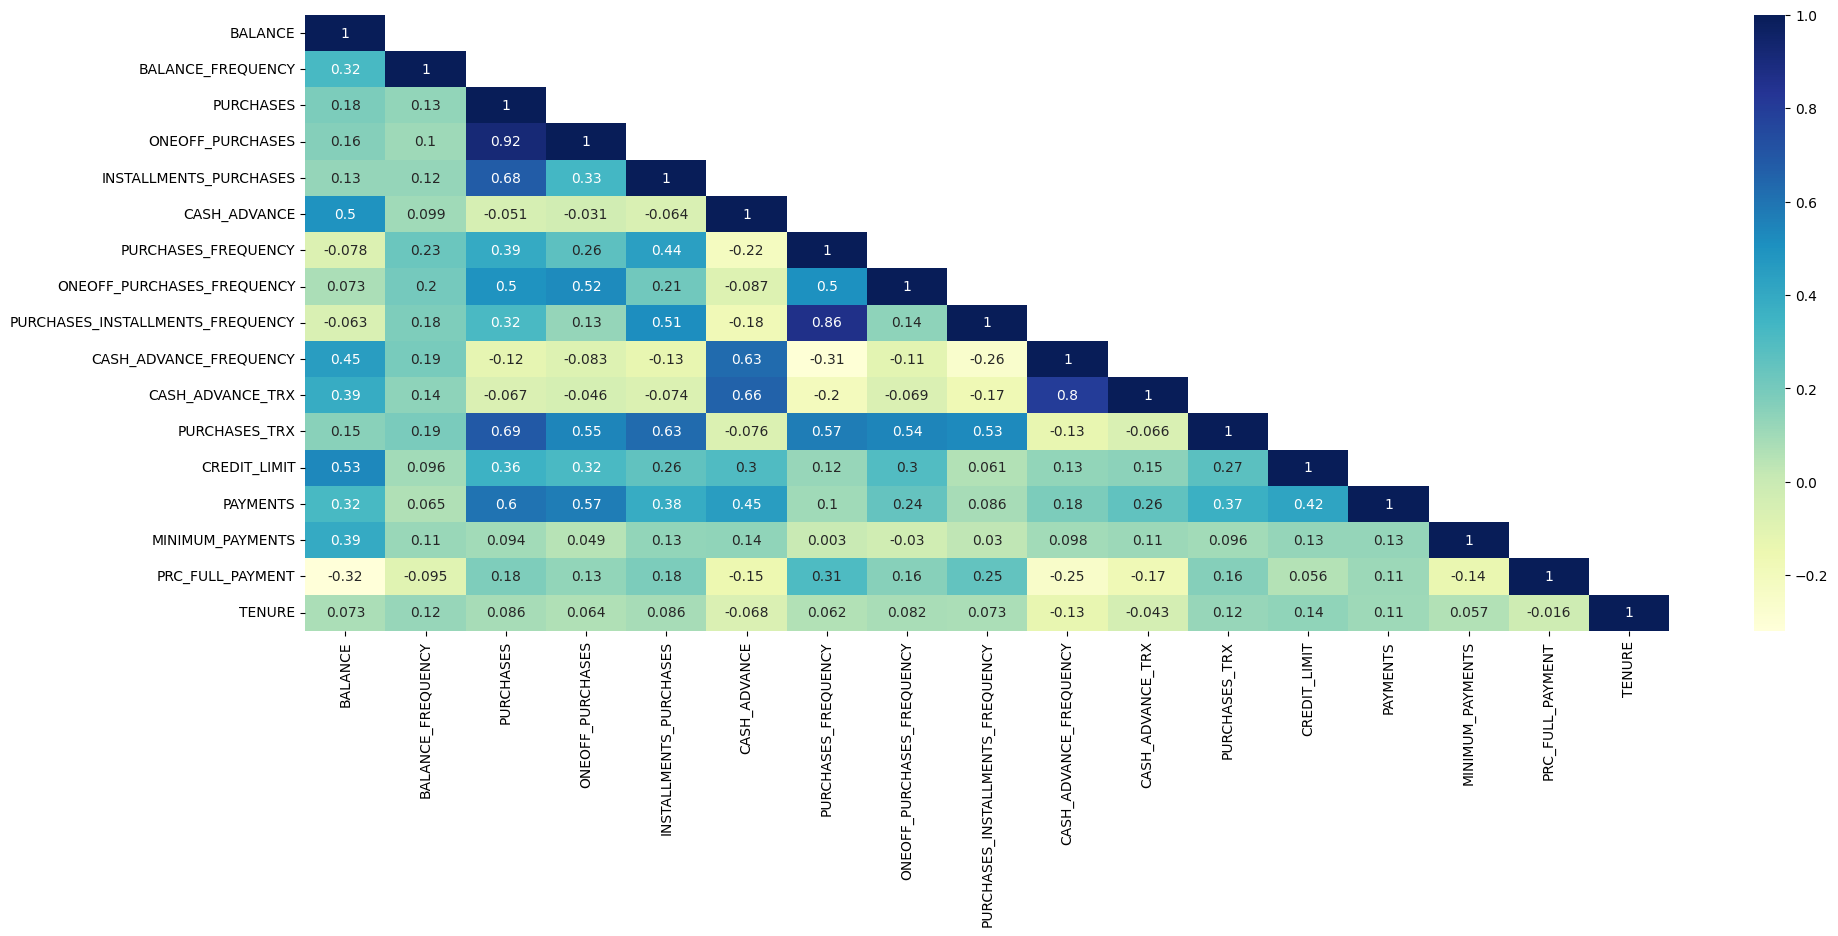

In [12]:
# Gráfica de correlación
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(22,8))
corr_df = corr = df_numeric.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

## Insights

* PURCHASES tiene correlación alta con varias columnas como ONEOFF-PURACHASES(0.92), INSTALLMENTS_PURCHASES(0.68), PURCHASES_TRX(0.69) y PAYMENTS(0.6). Por tanto se optará por eliminar esta columna

In [13]:
# Se selecciona las columnas de tipo numérico
cols_num = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]

In [14]:
cols_num #17 columnas

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

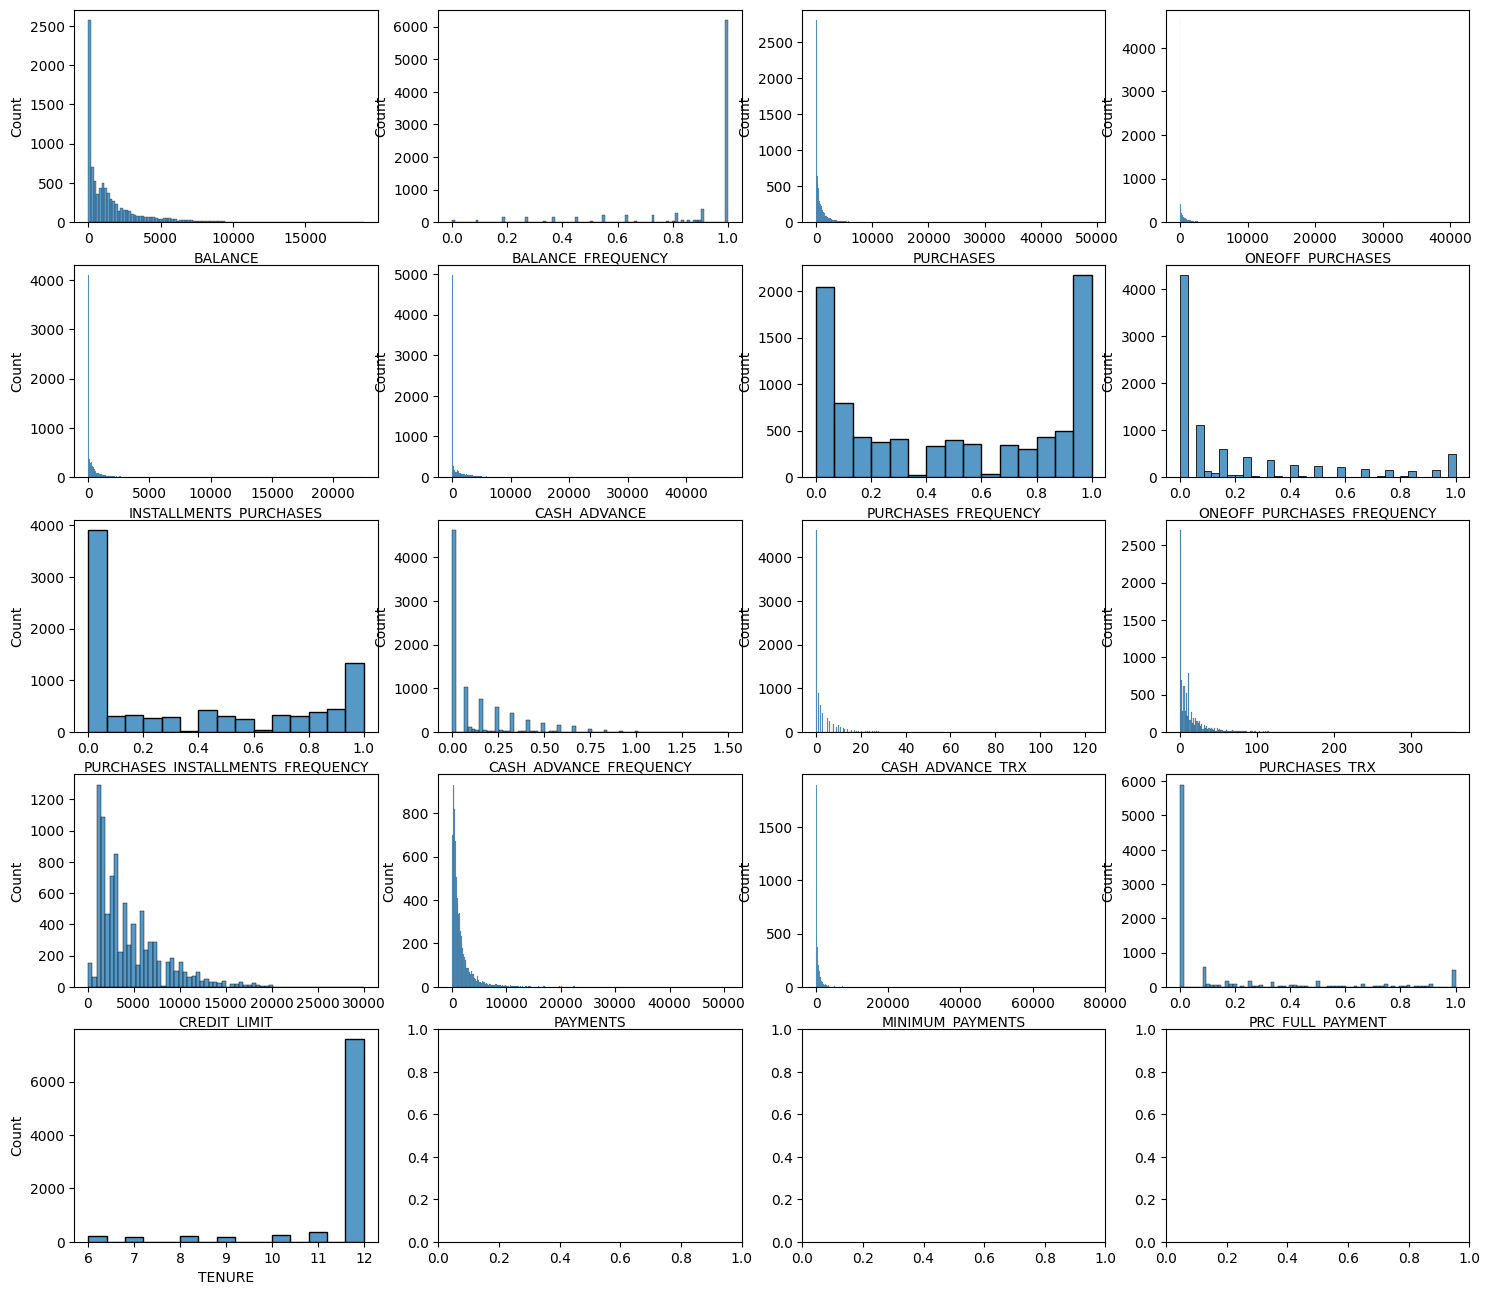

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column],ax=axes[i//4, i%4], kde=False)

Text(0.5, 1.0, 'Box-plot de Variables')

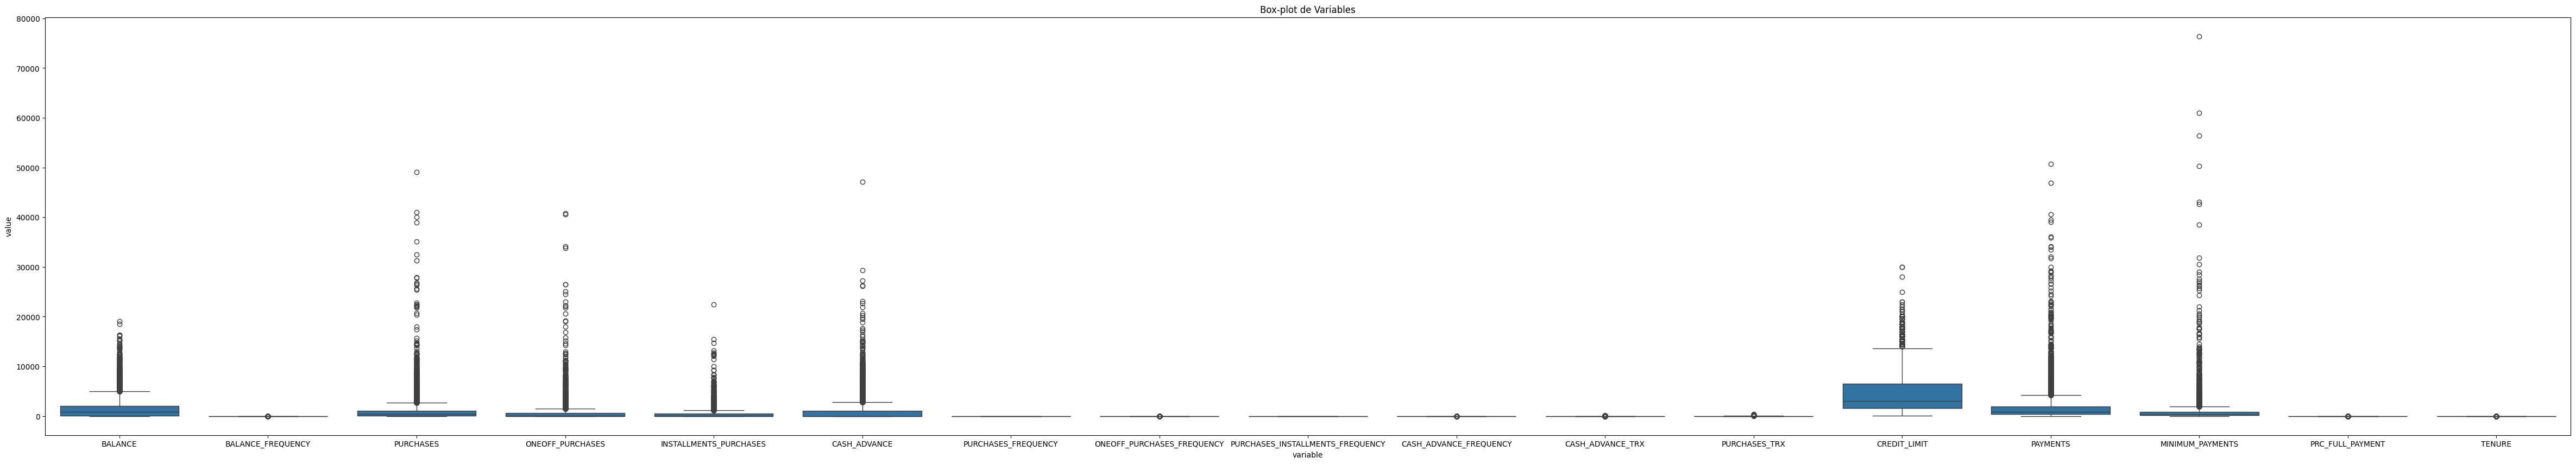

In [16]:
plt.figure(figsize=(60,10))
sns.boxplot(x='variable', y='value', data=pd.melt(df[cols_num])).set_title('Box-plot de Variables')

In [17]:
# Genera una copia del df original
df2 = df.copy()

In [18]:
# Eliminamos la columna que nos daban un alto nivel de correlación con otras columnas
df2.drop('PURCHASES', axis=1, inplace=True)
df2.drop('CUST_ID', axis=1, inplace=True)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   ONEOFF_PURCHASES                  8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   CASH_ADVANCE                      8950 non-null   float64
 5   PURCHASES_FREQUENCY               8950 non-null   float64
 6   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 7   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  PURCHASES_TRX                     8950 non-null   int64  
 11  CREDIT_LIMIT                      8950 non-null   float64
 12  PAYMEN

df2.drop('BALANCE', axis=1, inplace=True)
df2.drop('ONEOFF_PURCHASES', axis=1, inplace=True)
df2.drop('INSTALLMENTS_PURCHASES', axis=1, inplace=True)
df2.drop('CASH_ADVANCE', axis=1, inplace=True)
df2.drop('CREDIT_LIMIT', axis=1, inplace=True)
df2.drop('PAYMENTS', axis=1, inplace=True)
df2.drop('MINIMUM_PAYMENTS', axis=1, inplace=True)

In [20]:
# Escalamiento
from scipy.stats import zscore
df2 = df2.apply(zscore)

In [21]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521
CASH_ADVANCE_TRX,8950.0,-1.746585e-17,1.000056,-0.476070,-0.476070,-0.476070,1.100739e-01,17.547848


In [22]:
#Se selecciona las columnas de tipo numérico
cols_num = df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]

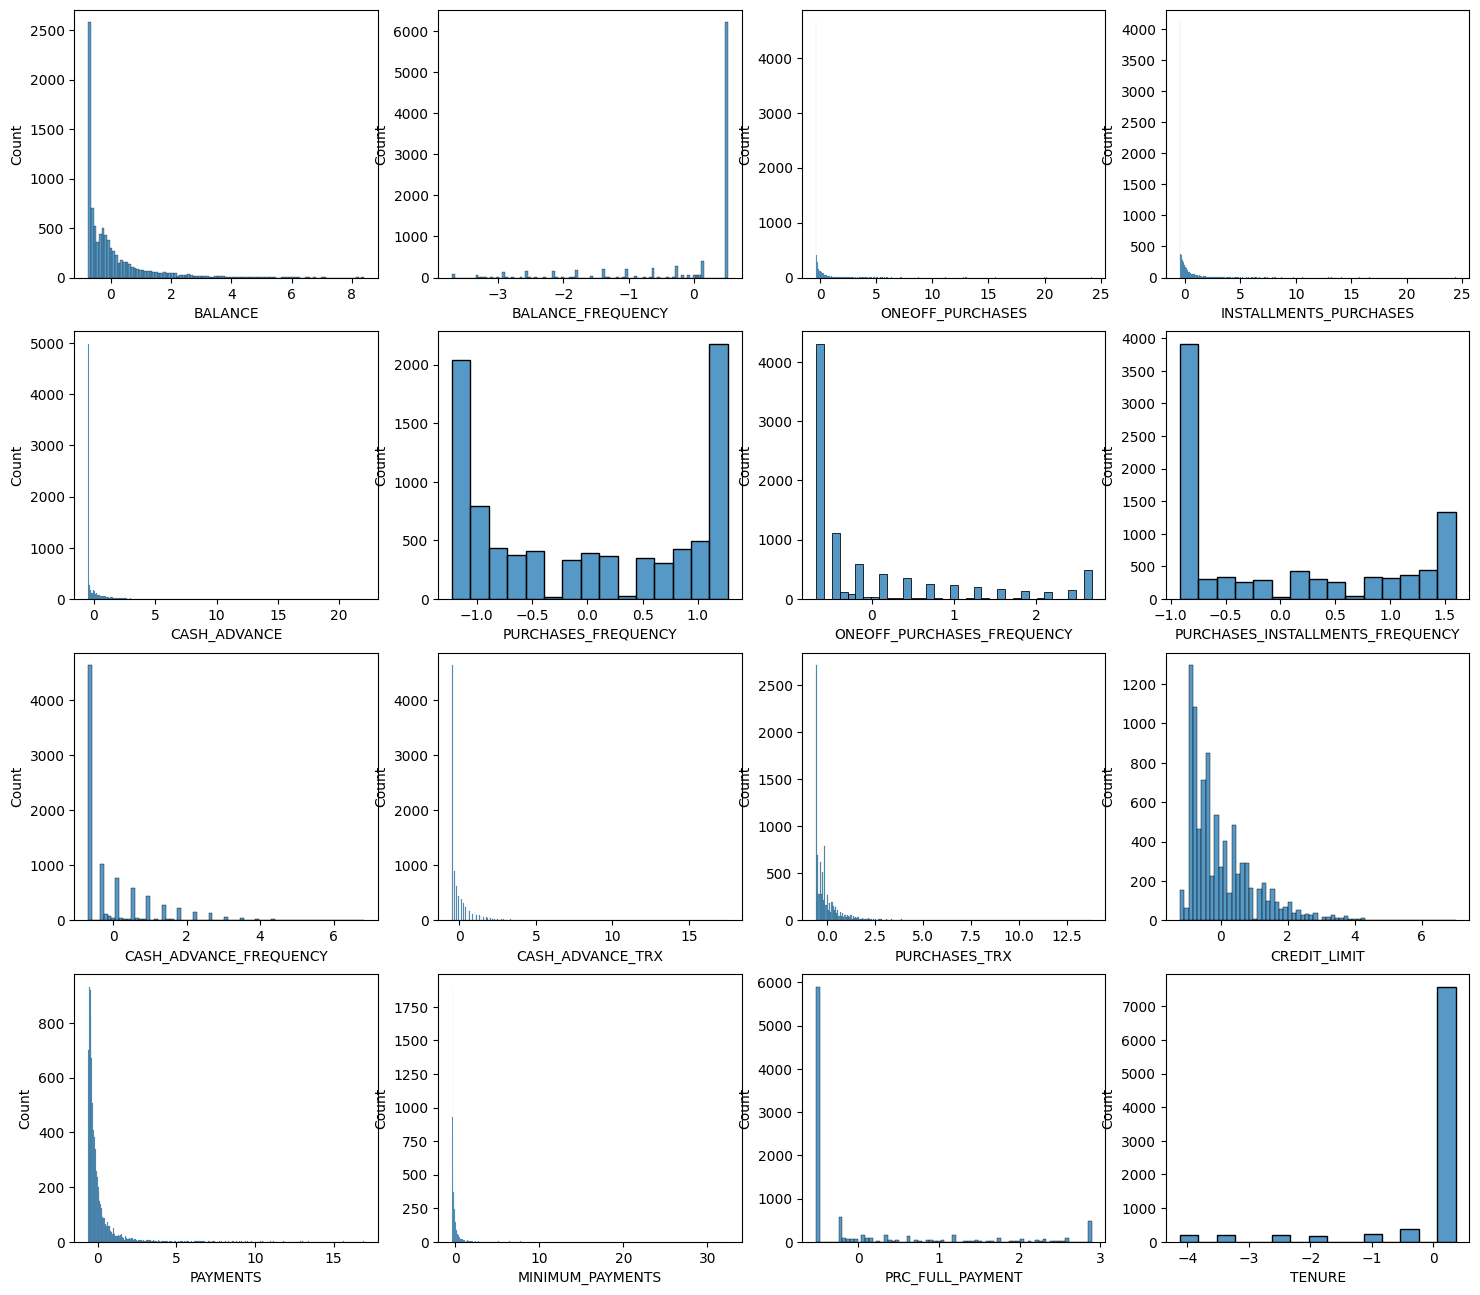

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df2[column],ax=axes[i//4, i%4], kde=False)

## Modelo Clustering K-means

Text(0.5, 1.0, 'Resultados KMeans')

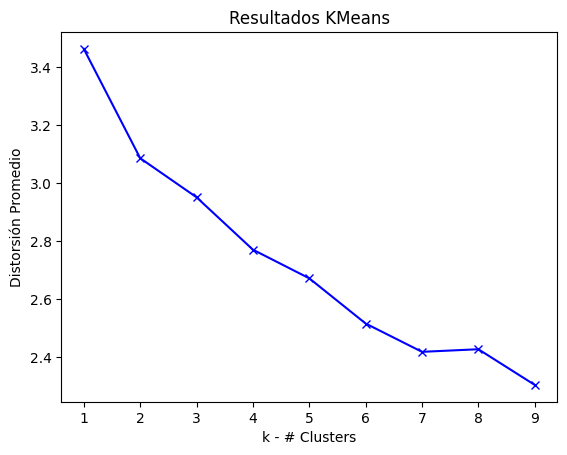

In [24]:
# Buscando el óptimo número de clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df2)
    prediction=model.predict(df2)
    
    meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1))/df2.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k - # Clusters')
plt.ylabel('Distorsión Promedio')
plt.title('Resultados KMeans')

In [50]:
kmeans= KMeans(n_clusters=2, n_init = 15, random_state=1)
kmeans.fit(df2)

KMeans(n_clusters=2, n_init=15, random_state=1)

In [51]:
#Coordenadas de los centroides para cada variable
centroids = kmeans.cluster_centers_
centroids

array([[ 8.52592591e-02, -1.99075303e-01, -2.26413044e-01,
        -3.77178341e-01,  2.10043930e-01, -7.70534374e-01,
        -3.83058726e-01, -6.86939230e-01,  2.98087141e-01,
         2.12943567e-01, -4.63664615e-01, -1.06841635e-01,
        -9.32623333e-02,  8.32129798e-04, -2.97613924e-01,
        -7.62665727e-02],
       [-1.11611321e-01,  2.60605802e-01,  2.96393134e-01,
         4.93757199e-01, -2.74964629e-01,  1.00869232e+00,
         5.01455102e-01,  8.99259456e-01, -3.90220370e-01,
        -2.78760490e-01,  6.06974782e-01,  1.39864410e-01,
         1.22087998e-01, -1.08932575e-03,  3.89600891e-01,
         9.98391614e-02]])

In [52]:
# Se genera un dataframe para los labels de los clusters y se les convierte en categorias, así cada registro tiene un cluster asociado
df_labels = pd.DataFrame(kmeans.labels_, columns= list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [53]:
df_labels

,labels
0,0
1,0
2,1
3,0
4,0
...,...
8945,1
8946,1
8947,1
8948,0


In [54]:
# Para los labels se crea el df3
df3 = df2.copy()
df3.head(1)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.356934,-0.349079,-0.466786,-0.80649,-0.678661,-0.707313,-0.675349,-0.47607,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068


In [55]:
df_labeled = df3.join(df_labels)

In [56]:
df_labeled.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'labels'],
      dtype='object')

In [57]:
df_labeled.sample(20)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
6262,0.397722,0.518084,-0.356934,-0.454576,-0.410354,-1.221758,-0.678661,-0.916995,0.990398,0.110074,-0.591796,-0.355773,-0.390471,-0.128115,-0.525551,0.36068,0
3658,-0.112370,0.518084,-0.173417,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.963484,-0.145999,-0.205549,-0.525551,0.36068,1
7141,-0.741086,-0.249434,-0.335847,-0.372567,-0.466786,0.439310,-0.399319,0.760469,-0.675349,-0.476070,-0.229714,-0.135897,-0.555221,-0.318182,0.096085,0.36068,1
2037,0.052051,0.518084,-0.286208,-0.252826,-0.412557,1.269843,-0.119974,1.389517,0.157527,-0.182998,0.253062,-0.740557,-0.405345,-0.145999,-0.525551,0.36068,1
7470,-0.711970,0.518084,-0.356934,0.066984,-0.466786,1.062211,-0.678661,1.389517,-0.675349,-0.476070,0.333524,-0.905464,-0.407259,-0.278627,0.614116,0.36068,1
2668,-0.724131,-0.249434,-0.072260,-0.454576,-0.466786,0.646943,1.835423,-0.916995,-0.675349,-0.476070,-0.229714,0.751104,-0.392035,-0.296046,2.551552,0.36068,1
845,0.360586,0.518084,-0.356934,-0.454576,1.084460,-1.221758,-0.678661,-0.916995,2.656150,3.480400,-0.591796,-0.410743,0.253828,0.052623,-0.525551,0.36068,0
5038,0.024740,0.518084,-0.356934,-0.155999,0.769364,0.024043,-0.678661,0.131420,2.656150,1.135825,-0.350408,0.413794,0.587660,-0.214495,-0.145662,0.36068,0
1142,-0.184353,0.518084,-0.118206,0.516686,-0.466786,0.854576,2.114765,0.131420,-0.675349,-0.476070,0.253062,0.001526,-0.131734,-0.248349,-0.525551,0.36068,1
2696,1.720280,0.518084,0.052333,0.979061,5.176487,0.854576,0.438709,1.179833,0.990398,0.696218,0.735837,2.475134,2.530690,0.379435,-0.525551,0.36068,1


In [58]:
# Divisón de los clusters
df_labeled['labels'].value_counts()

labels
0    5078
1    3872
Name: count, dtype: int64

Text(0.5, 1.0, 'KMeans')

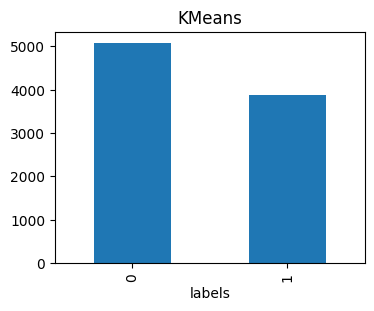

In [59]:
# Grafico de clusters por registro
fig, ax = plt.subplots(1,1, figsize=(4,3))
pd.value_counts(df_labeled['labels']).plot(kind='bar').set_title('KMeans')

Text(0.5, 0.98, 'Configuracion de Clusters por Variable (KMeans)')

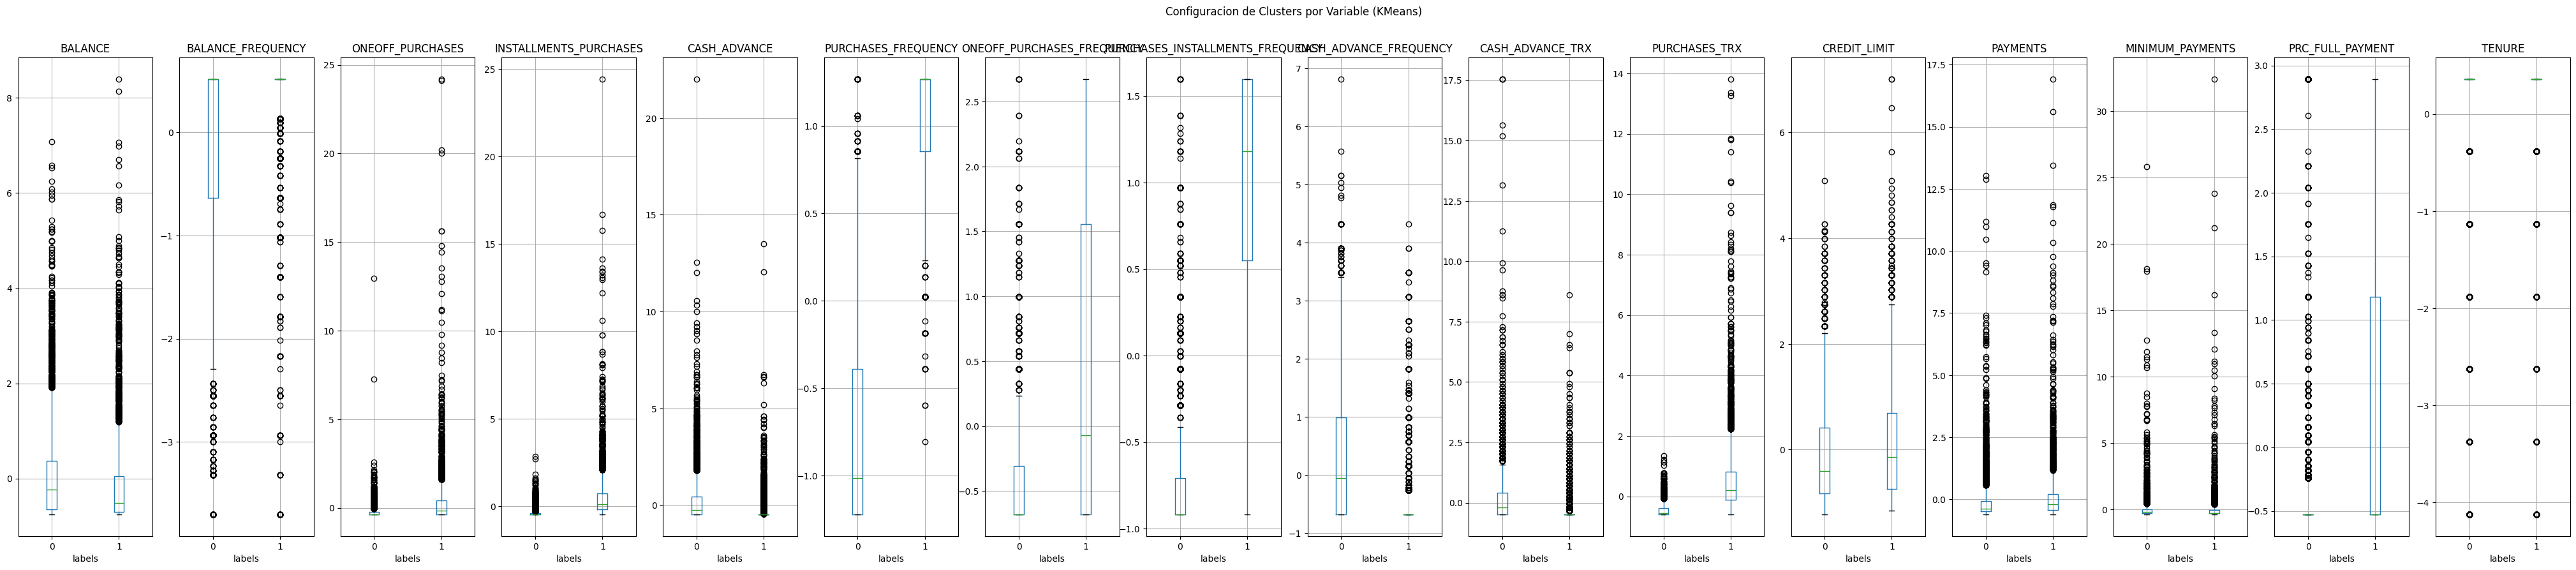

In [60]:
# Gráfico de Clases
fig, ax = plt.subplots(1,16,figsize=(50,10))
df_labeled.boxplot('BALANCE', 'labels', ax=ax[0])
df_labeled.boxplot('BALANCE_FREQUENCY', 'labels', ax=ax[1])
df_labeled.boxplot('ONEOFF_PURCHASES', 'labels', ax=ax[2])
df_labeled.boxplot('INSTALLMENTS_PURCHASES', 'labels', ax=ax[3])
df_labeled.boxplot('CASH_ADVANCE', 'labels', ax=ax[4])
df_labeled.boxplot('PURCHASES_FREQUENCY', 'labels', ax=ax[5])
df_labeled.boxplot('ONEOFF_PURCHASES_FREQUENCY', 'labels', ax=ax[6])
df_labeled.boxplot('PURCHASES_INSTALLMENTS_FREQUENCY', 'labels', ax=ax[7])
df_labeled.boxplot('CASH_ADVANCE_FREQUENCY', 'labels', ax=ax[8])
df_labeled.boxplot('CASH_ADVANCE_TRX', 'labels', ax=ax[9])
df_labeled.boxplot('PURCHASES_TRX', 'labels', ax=ax[10])
df_labeled.boxplot('CREDIT_LIMIT', 'labels', ax=ax[11])
df_labeled.boxplot('PAYMENTS', 'labels', ax=ax[12])
df_labeled.boxplot('MINIMUM_PAYMENTS', 'labels', ax=ax[13])
df_labeled.boxplot('PRC_FULL_PAYMENT', 'labels', ax=ax[14])
df_labeled.boxplot('TENURE', 'labels', ax=ax[15])
fig.suptitle('Configuracion de Clusters por Variable (KMeans)')

In [61]:
df_labeled.head(6)

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,labels
0,-0.731989,-0.249434,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,0
1,0.786961,0.134325,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,0
2,0.447135,0.518084,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1
3,0.049099,-1.016953,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,0
4,-0.358775,0.518084,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,0
5,0.117878,0.518084,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,1


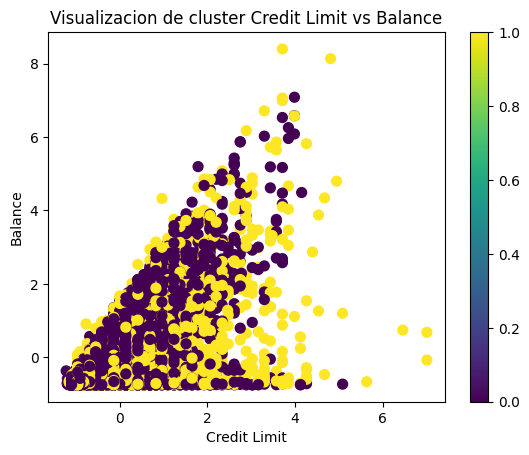

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['CREDIT_LIMIT'], df_labeled['BALANCE'], c=df_labeled['labels'],s=50)
ax.set_title('Visualizacion de cluster Credit Limit vs Balance')
ax.set_xlabel('Credit Limit')
ax.set_ylabel('Balance')
plt.colorbar(scatter)

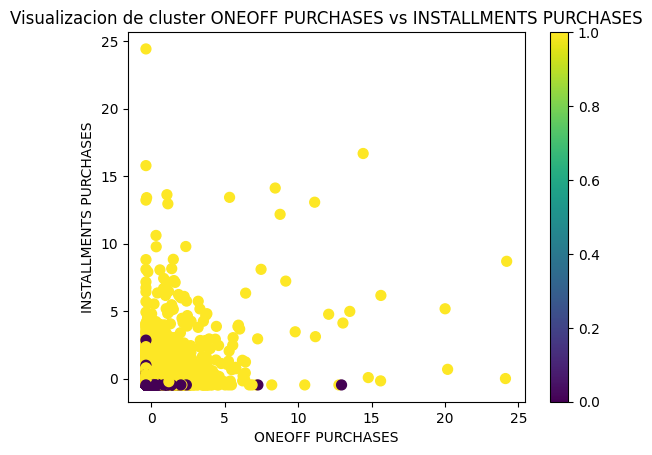

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df_labeled['ONEOFF_PURCHASES'], df_labeled['INSTALLMENTS_PURCHASES'], c=df_labeled['labels'],s=50)
ax.set_title('Visualizacion de cluster ONEOFF PURCHASES vs INSTALLMENTS PURCHASES')
ax.set_xlabel('ONEOFF PURCHASES')
ax.set_ylabel('INSTALLMENTS PURCHASES')
plt.colorbar(scatter)

In [65]:
# Se genera la matriz de enlaces
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df2, 'average', metric='euclidean')
Z.shape

(8949, 4)

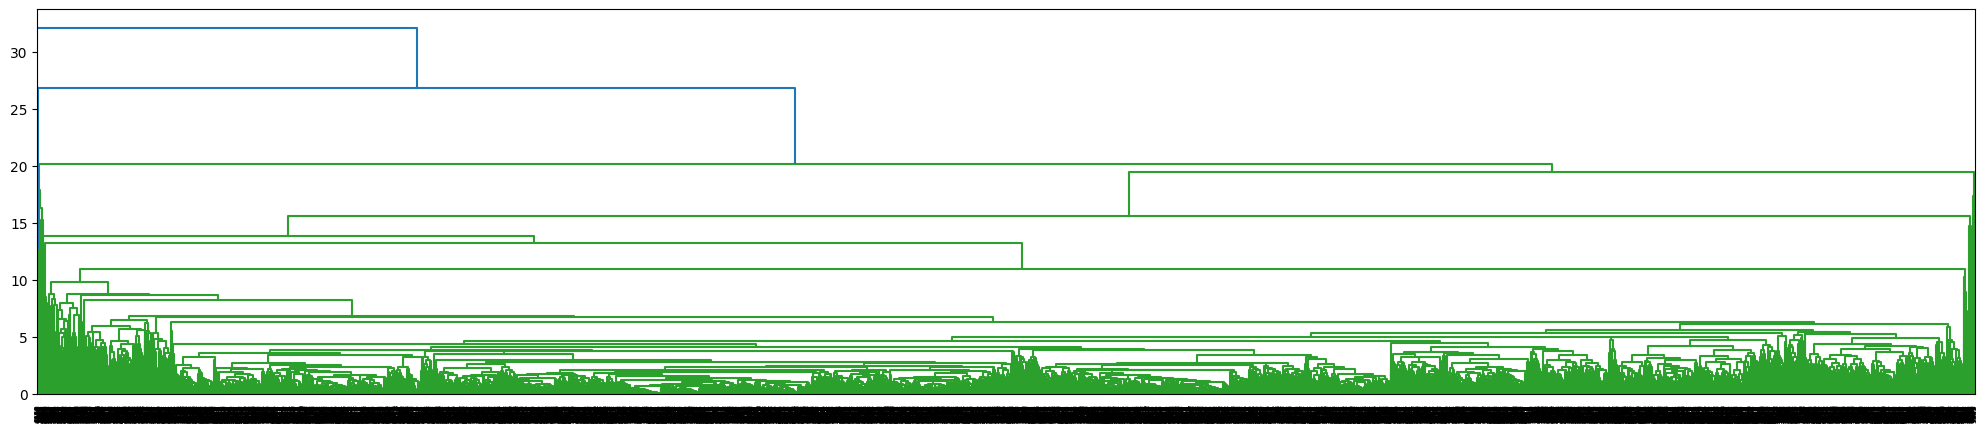

In [66]:
# Generate Dendrogram
plt.figure(figsize=(25,5))
dendrogram(Z)
plt.show()

In [67]:
# Se calcula el Coeficiente Cofenético para validar la calidad del fit del dendrograma
c, coph_dists = cophenet(Z, pdist(df2))
print('Cophenetic Coefficient:', format(c, '.4f'))

Cophenetic Coefficient: 0.8657


In [68]:
# Silhouette Score

# Genera un dataframe para el resultado
sil_df = pd.DataFrame({}, columns=['Model', 'n_clusters', 'score'], index=None)

In [71]:
from sklearn.metrics import silhouette_score

# Resultado de KMeans de 2 a 10 clusters
clusters=range(2,10)
for n_clusters in clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict(df2)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df2, clusterer.labels_, metric='euclidean')
    new_row = pd.DataFrame({'Model': ['KMeans'], 'n_clusters': [n_clusters], 'score': [score]})
    sil_df = pd.concat([sil_df, new_row], ignore_index=True)


Text(0.5, 1.0, 'Silhouette Score')

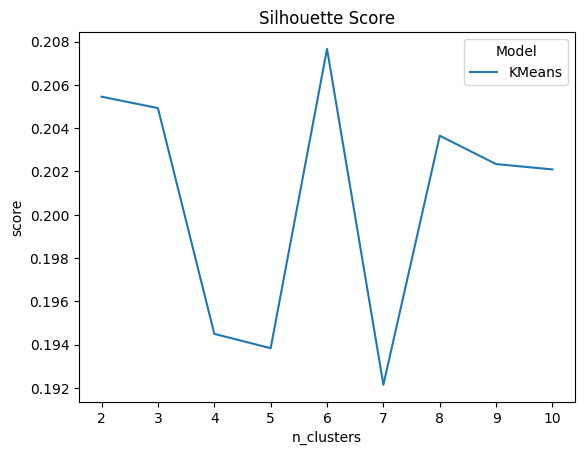

In [72]:
sns.lineplot(data=sil_df, x='n_clusters', y='score', hue='Model', style='Model', ci=None).set_title('Silhouette Score')